In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_df = pd.read_csv("Data/mouse_drug_data.csv")
clinical_trial_df = pd.read_csv("Data/clinicaltrial_data.csv")



In [2]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
#mouse_drug_df.describe

In [4]:
# Remove any duplicates from the mouse dataset and check to make sure
# each unique mouse ID is still represented
mouse_drug_no_duplicates_df = mouse_drug_df.drop_duplicates(subset="Mouse ID")
print(len(mouse_drug_no_duplicates_df["Mouse ID"].unique()))

249


In [5]:
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
#clinical_trial_df.describe

In [7]:
# Merge dataframes

merged_mouse_data_df = pd.merge(clinical_trial_df,
                               mouse_drug_no_duplicates_df, 
                                on="Mouse ID",
                               how="left")
merged_mouse_data_df.describe

<bound method NDFrame.describe of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        f932          0           45.000000                 0   Ketapril
2        g107          0           45.000000                 0   Ketapril
3        a457          0           45.000000                 0   Ketapril
4        c819          0           45.000000                 0   Ketapril
5        h246          0           45.000000                 0   Ketapril
6        p189          0           45.000000                 0   Ketapril
7        n923          0           45.000000                 0   Ketapril
8        q119          0           45.000000                 0   Ketapril
9        f993          0           45.000000                 0   Naftisol
10       z234          0           45.000000                 0   Naftisol
11       b559          0           45.000000                 0   Naftisol
12  

In [8]:
# Ensure that all NAs are removed

merged_mouse_data_df.dropna(how="any")
merged_mouse_data_df.describe

<bound method NDFrame.describe of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        f932          0           45.000000                 0   Ketapril
2        g107          0           45.000000                 0   Ketapril
3        a457          0           45.000000                 0   Ketapril
4        c819          0           45.000000                 0   Ketapril
5        h246          0           45.000000                 0   Ketapril
6        p189          0           45.000000                 0   Ketapril
7        n923          0           45.000000                 0   Ketapril
8        q119          0           45.000000                 0   Ketapril
9        f993          0           45.000000                 0   Naftisol
10       z234          0           45.000000                 0   Naftisol
11       b559          0           45.000000                 0   Naftisol
12  

In [9]:
merged_mouse_data_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


## Tumor Response to Treatment

In [10]:
# Group by drug and timepoint

merged_grouped_by_drug_and_timepoint= merged_mouse_data_df.groupby([
    "Drug",
    "Timepoint"
])

# Get mean tumor size for each time point for each drug

tumor_response_series = merged_grouped_by_drug_and_timepoint["Tumor Volume (mm3)"].mean()
tumor_response_series

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.

In [11]:
tumor_response_df = pd.DataFrame(tumor_response_series)
tumor_response_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [12]:
# Reset the index to return Drug and Timepoint as columns and rename column

tumor_response_df.reset_index(inplace=True)
tumor_response_df.rename(columns= {"Tumor Volume (mm3)": "Tumor Mean Volume (mm3)"}, inplace = True)
tumor_response_df.head()

,Drug,Timepoint,Tumor Mean Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [13]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_volume_se_by_drug_and_timepoint_series = merged_grouped_by_drug_and_timepoint["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

tumor_se_df = pd.DataFrame(tumor_volume_se_by_drug_and_timepoint_series)
tumor_se_df.reset_index(inplace = True)

# Rename Column

tumor_se_df.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume SE"}, inplace = True)

# Preview DataFrame

tumor_se_df.head()


,Drug,Timepoint,Tumor Volume SE
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
# For the mean

long_tumor_response_df = tumor_response_df.pivot(index="Timepoint", columns = "Drug", values="Tumor Mean Volume (mm3)")
long_tumor_response_df.reset_index(inplace=True)
long_tumor_response_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,54.067395,53.170334


In [15]:
# For the SE

long_tumor_se_df = tumor_se_df.pivot(index="Timepoint", columns = "Drug", values="Tumor Volume SE")
long_tumor_se_df.reset_index(inplace=True)
long_tumor_se_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


In [16]:
# Store means and SEs in variables to plot

x_axis = long_tumor_response_df["Timepoint"]
capomulin_mean = long_tumor_response_df["Capomulin"]
infubinol_mean = long_tumor_response_df["Infubinol"]
ketapril_mean = long_tumor_response_df["Ketapril"]
placebo_mean = long_tumor_response_df["Placebo"]

capomulin_se = long_tumor_se_df["Capomulin"]
infubinol_se = long_tumor_se_df["Infubinol"]
ketapril_se = long_tumor_se_df["Ketapril"]
placebo_se = long_tumor_se_df["Placebo"]

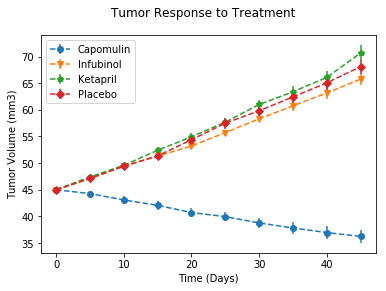

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

#capomulin_plot, = ax.plot(x_axis, capomulin_mean, label="Capomulin")
#infubinol_plot, = ax.plot(x_axis, infubinol_mean, label = "Infubinol")
#ketapril_plot, = ax.plot(x_axis, ketapril_mean, label="Ketapril")
#placebo_plot, = ax.plot(x_axis, placebo_mean, label="Placebo")


ax.errorbar(x_axis, capomulin_mean, capomulin_se, label="Capomulin", linestyle= '--', marker="o")
ax.errorbar(x_axis, infubinol_mean, infubinol_se, label="Infubinol", linestyle= '--', marker="v")
ax.errorbar(x_axis, ketapril_mean, ketapril_se, label="Ketapril", linestyle= '--', marker="p")
ax.errorbar(x_axis, placebo_mean, placebo_se, label="Placebo", linestyle= '--', marker="D")
plt.legend(loc="best")

ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Time (Days)")
fig.suptitle("Tumor Response to Treatment")
plt.show()
# Save the Figure

plt.savefig("tumor_response.png")

## Metastatic Response to Treatment

In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_group = merged_mouse_data_df["Metastatic Sites"].groupby([merged_mouse_data_df["Drug"], merged_mouse_data_df["Timepoint"]])

# Convert to DataFrame

metastatic_df = pd.DataFrame(metastatic_group.mean())

metastatic_df.reset_index(inplace=True)
metastatic_df = metastatic_df.rename(columns={
    "Metastatic Sites": "Mean Metastatic Sites"
})
metastatic_df.head()

,Drug,Timepoint,Mean Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_se_df = pd.DataFrame(metastatic_group.sem())

metastatic_se_df = metastatic_se_df.rename(columns = {
    "Metastatic Sites": "Metastatic SE"
})
metastatic_se_df.reset_index(inplace=True)

# Preview DataFrame
metastatic_se_df.head()

,Drug,Timepoint,Metastatic SE
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [20]:
# Minor Data Munging to Re-Format the Data Frames

long_metastatic_df = metastatic_df.pivot(index= "Timepoint", columns= "Drug", values= "Mean Metastatic Sites")
long_metastatic_df.reset_index(inplace=True)

long_metastatic_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [21]:
long_metastatic_se_df = metastatic_se_df.pivot(index="Timepoint", columns= "Drug", values= "Metastatic SE")
long_metastatic_se_df.reset_index(inplace=True)
long_metastatic_se_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.200905,0.166378


In [22]:
# Store values in variables for plotting
x_axis = long_metastatic_df["Timepoint"] +1
met_capomulin_mean = long_metastatic_df["Capomulin"]
met_infubinol_mean = long_metastatic_df["Infubinol"]
met_ketapril_mean = long_metastatic_df["Ketapril"]
met_placebo_mean = long_metastatic_df["Placebo"]

met_capomulin_se = long_metastatic_se_df["Capomulin"]
met_infubinol_se = long_metastatic_se_df["Infubinol"]
met_ketapril_se = long_metastatic_se_df["Ketapril"]
met_placebo_se = long_metastatic_se_df["Placebo"]

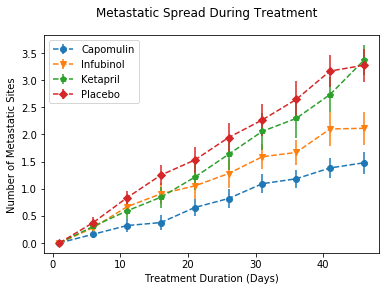

In [23]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

ax.errorbar(x_axis, met_capomulin_mean, met_capomulin_se, label="Capomulin", linestyle="--", marker = "o")
ax.errorbar(x_axis, met_infubinol_mean, met_infubinol_se, label="Infubinol", linestyle= '--', marker="v")
ax.errorbar(x_axis, met_ketapril_mean, met_ketapril_se, label="Ketapril", linestyle= '--', marker="p")
ax.errorbar(x_axis, met_placebo_mean, met_placebo_se, label="Placebo", linestyle= '--', marker="D")
plt.legend(loc="best")

ax.set_ylabel("Number of Metastatic Sites")
ax.set_xlabel("Treatment Duration (Days)")
fig.suptitle("Metastatic Spread During Treatment")
# Save the Figure
plt.savefig("metastatic_spread.png")
# Show the Figure
plt.show()

## Survival Rates

In [24]:
merged_mouse_data_df["Timepoint"].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [25]:
# Construct grouped dataframe using drug and timepoint

mortality_group = merged_mouse_data_df.groupby([merged_mouse_data_df["Drug"], merged_mouse_data_df["Timepoint"]])
mortality_df = pd.DataFrame(mortality_group.count())
mortality_df.reset_index(inplace=True)
mortality_df = mortality_df[["Drug", "Timepoint", "Mouse ID"]]
mortality_df = mortality_df.rename(columns={
    "Mouse ID": "Mouse Count"
})
mortality_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [27]:
# Pivot dataframe

long_mortality_df = mortality_df.pivot(index="Timepoint", columns= "Drug", values="Mouse Count")
long_mortality_df.reset_index(inplace=True)
long_mortality_df = long_mortality_df[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
long_mortality_df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


In [28]:
# Calculate survival rate in new columns

long_mortality_df["Capomulin Survival Rate (%)"] = (long_mortality_df["Capomulin"]/25) * 100
long_mortality_df["Infubinol Survival Rate (%)"] = (long_mortality_df["Infubinol"]/25) * 100
long_mortality_df["Ketapril Survival Rate (%)"] = (long_mortality_df["Ketapril"]/25) * 100
long_mortality_df["Placebo Survival Rate (%)"] = (long_mortality_df["Placebo"]/25) * 100

long_mortality_df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin Survival Rate (%),Infubinol Survival Rate (%),Ketapril Survival Rate (%),Placebo Survival Rate (%)
0,0,25,25,25,25,100.0,100.0,100.0,100.0
1,5,25,25,23,24,100.0,100.0,92.0,96.0
2,10,25,21,22,24,100.0,84.0,88.0,96.0
3,15,24,21,19,20,96.0,84.0,76.0,80.0
4,20,23,20,19,19,92.0,80.0,76.0,76.0
5,25,22,18,19,17,88.0,72.0,76.0,68.0
6,30,22,17,18,15,88.0,68.0,72.0,60.0
7,35,22,12,17,14,88.0,48.0,68.0,56.0
8,40,21,10,15,12,84.0,40.0,60.0,48.0
9,45,21,9,11,11,84.0,36.0,44.0,44.0


In [30]:
# Store variables for plotting

cap_survival = long_mortality_df["Capomulin Survival Rate (%)"] 
inf_survival = long_mortality_df["Infubinol Survival Rate (%)"]
ket_survival = long_mortality_df["Ketapril Survival Rate (%)"]
plac_survival = long_mortality_df["Placebo Survival Rate (%)"]

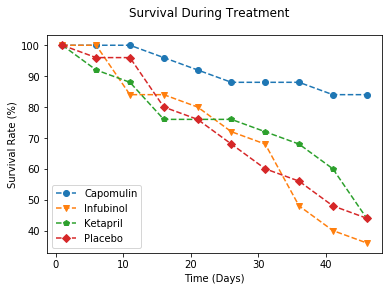

In [31]:
# Generate the Plot (Accounting for percentages)


plt.plot(x_axis, cap_survival, label = "Capomulin", linestyle= '--', marker="o")


plt.plot(x_axis, inf_survival, label = "Infubinol", linestyle= '--', marker="v")


plt.plot(x_axis, ket_survival, label = "Ketapril", linestyle= '--', marker="p")


plt.plot(x_axis, plac_survival, label = "Placebo", linestyle= '--', marker="D")


plt.suptitle("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.legend(loc="best")
# Save the Figure
plt.savefig("survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [32]:
# Calculate the percent changes for each drug
final_mean_vol_row = long_tumor_response_df.loc[long_tumor_response_df["Timepoint"] == 45]


In [34]:
# Extract the first row of data

original_mean_vol_row = long_tumor_response_df.loc[long_tumor_response_df["Timepoint"] == 0]
original_mean_vol_row

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0


In [35]:
# Calculate percent change betweent the two dataframes

cap_percent_change = ((final_mean_vol_row.iloc[0]["Capomulin"]/ \
                       original_mean_vol_row.iloc[0]["Capomulin"]) - 1) * 100
inf_percent_change = ((final_mean_vol_row.iloc[0]["Infubinol"]/ \
                       original_mean_vol_row.iloc[0]["Infubinol"]) - 1) * 100
ket_percent_change = ((final_mean_vol_row.iloc[0]["Ketapril"]/ \
                       original_mean_vol_row.iloc[0]["Ketapril"]) - 1) * 100
plac_percent_change = ((final_mean_vol_row.iloc[0]["Placebo"]/ \
                        original_mean_vol_row.iloc[0]["Placebo"]) - 1) * 100

In [36]:
# Construct dictionary with calculations

vol_change_dict = {
    "Capomulin": [cap_percent_change],
    "Infubinol": [inf_percent_change],
    "Ketapril": [ket_percent_change],
    "Placebo": [plac_percent_change]
}

vol_change_dict

{'Capomulin': [-19.47530266789417],
 'Infubinol': [46.12347172785185],
 'Ketapril': [57.02879468660606],
 'Placebo': [51.29796048315151]}

In [37]:
# Create new dataframe for the change in volume

vol_change_df = pd.DataFrame.from_dict(vol_change_dict)
vol_change_df = vol_change_df.T
vol_change_df.reset_index(inplace=True)
vol_change_df.rename(columns = {
    "index": "drug",
    0 : "volume_change"
}, inplace=True)
vol_change_df

,drug,volume_change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [39]:
# Set plotting variables

x_axis = np.arange(len(vol_change_df))

tick_locations = [value for value in x_axis]
labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

C:\Users\Stewart\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


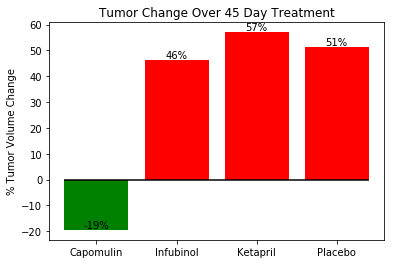

In [40]:
# Note: the mandated color scheme for this chart is bad form, as it is not useful to color-blind viewers...
figure, ax = plt.subplots()

rects = plt.bar(vol_change_df["drug"], vol_change_df["volume_change"], color = ["green", "red", \
                                                         "red", "red"], align = "center")
# Keep getting a dictionary length error here?
#ax.set_xticklabels(labels, tick_locations, rotation = 0)

plt.hlines(0, min(x_axis)-0.4, max(x_axis)+0.4)
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    for rect in rects:
        height = rect.get_height()
        label_position = height #+ (y_height * 0.00001)
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
           "%d" % int(height) + "%",
           ha ="center", va = "bottom")
autolabel(rects, ax)

plt.savefig("tumor_change.png")
fig.show()

### Observable Trends